# Tutorial 2: Trends

From the first tutorial we start with the following code:

In [1]:
import pandas as pd

from neuralprophet import NeuralProphet

# Prepare dataset
df = pd.read_csv("datasets/energy_dataset.csv")
df = df[["time", "price actual"]].dropna()
df = df.rename(columns={"time": "ds", "price actual": "y"})
df["ds"] = pd.to_datetime(df["ds"], utc=True).dt.tz_localize(None)

# Model and prediction
m = NeuralProphet(epochs=5)
metrics = m.fit(df)
forecast = m.predict(df)

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.997% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as H
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64


  0%|          | 0/163 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.27E-02, min: 1.14E-01


  0%|          | 0/163 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.27E-02, min: 1.14E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 6.53E-02
Epoch[10/10]: 100%|██████████| 10/10 [00:13<00:00,  1.40s/it, SmoothL1Loss=0.0066, MAE=5.93, RMSE=7.96, Loss=0.00478, RegLoss=0]
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.997% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.997% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


Let us explore the trends within our dataset and see how our model automatically fitted to those trends. Later we look into how we can fine tune the model trend parameters.

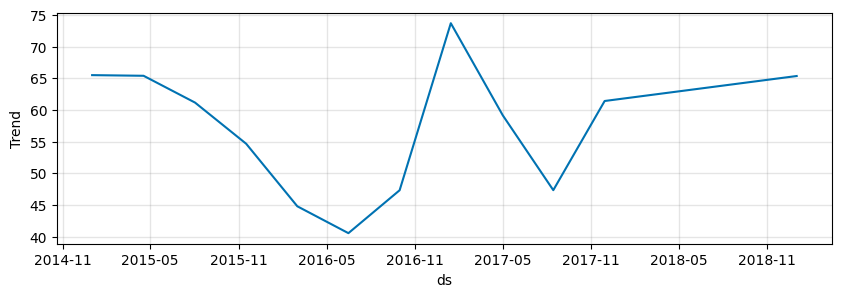

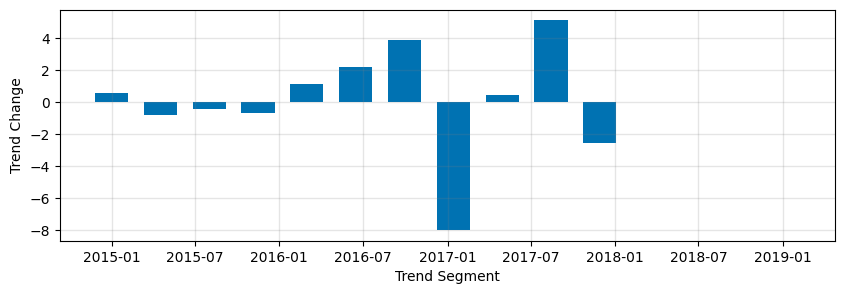

In [9]:
from neuralprophet.plot_model_parameters import plot_trend, plot_trend_change

figsize = (10, 3)

plt = plot_trend(m, figsize=figsize)
plt = plot_trend_change(m, figsize=figsize)

Trend features we could cover:

- Changepoints and how are they set automatically
- Trend regularization
- Trend global and local
- Advanced users: discontinuous trend


In [ ]:
class Trend:
    growth: str
    changepoints: list
    n_changepoints: int
    changepoints_range: float
    trend_reg: float
    trend_reg_threshold: Union[bool, float]
    trend_global_local: str